In [1]:
print("hello world")

hello world


In [2]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
def f(x):
    return 3*x**2 - 4*x + 5

In [4]:
f(5)

60

In [5]:
f(3)

20

In [88]:
xs = np.arange(-5,5,0.25)

In [89]:
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [90]:
ys = f(xs)

In [91]:
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

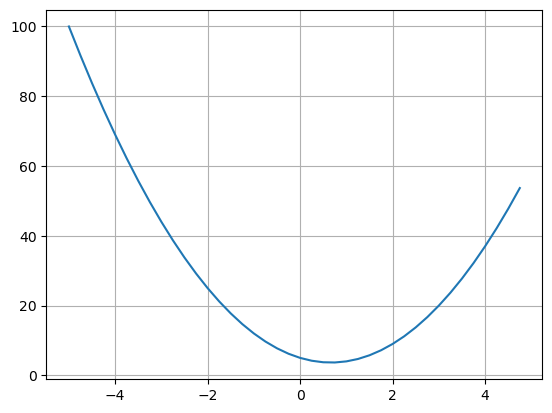

In [92]:
# plotting X's and Y's in graph using matplot
plt.plot(xs,ys)
plt.grid()
plt.show()

In [ ]:
# here the graph is a parabola since the function f(X) = 3x^2 - 4x + 5
# Now using the concept of derivative -> response to the small 'h' to a point in the curve

In [7]:
h = 0.00000001 
x = 3.0
f(x)

20.0

In [8]:
f(x + h)

20.00000014

In [9]:
f(x + h) - f(x) # response of the function to the change

1.400000009255109e-07

In [10]:
# using the concept of slope = rise/run
(f(x + h) - f(x))/h # ≈ 14

14.00000009255109

In [11]:
# to get slope = 0
x = 2/3
(f(x + h) - f(x))/h

0.0

In [12]:
# Moving on to the more complex case (multiple variable)
a = 2.0
b = -3.0
c = 10
d = a*b + c
print(d)

4.0


In [13]:
#derivative of d w.r.t a,b and c
h = 0.00001
#inputs
a = 2.0
b = -3.0
c = 10
d1 = a*b + c # -> f(x)
# derivative w.r.t a
a += h
d2 = a*b + c # -> f(x+h)

print('d1',d1)
print('d2',d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 3.9999699999999994
slope -3.000000000064062


In [88]:
# Value class
# Note : Dunder (double underscore) methods like __add__() are called automatically 
# for a + b => it will call a.__add__(b) internally
class Value:
    def __init__(self, data, _children=(), _op='', label = ''): #constructor of the class, and _children = () is an empty tuple, _op is an empty string which tells what operator created that children
        self.data = data
        self.grad = 0.0 # stores gradient of output 'L' with respect to current node
        self._backward = lambda: None # For the implementation of chain rule for back propagation and it is a lambda function (means take any number of arguments but performs a single expression operation)
        self._prev = set(_children) # here prev is a 'private' / internal variable which stores the tuple _children
        self._op = _op
        self.label = label
        
    def __repr__(self): #for string representation of the object
        return f"Value(data={self.data})"
        
    def __add__(self, other): # overloading '+' operator to add two Value objects

        # Checking if 'other' is a Value object or not, if not create instance of Value object of constant
        other = other if isinstance(other, Value) else Value(other)

        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1.0 * out.grad 
            other.grad += 1.0 * out.grad
            # Lets take an example of c = a + b then
            # dc/da = ? where 'c' is out and 'a' is self and 'b' is other
            # d(a+b)/da => dc/da is 1*c.grad cause for a 'c' is constant 
            # So the main concept is current gradient = local gradient *  parent gradient
        out._backward = _backward
        
        return out 

    def __radd__(self, other): # other + self
        return self + other

    def __neg__(self): # -self
        return self * -1

    def __sub__(self, other):
        return self + (-other)
    def __mul__(self, other): # overloading '*' operator to multiply two Value objects
        
        other = other if isinstance(other, Value) else Value(other)    

        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad 
            other.grad += self.data * out.grad
        out._backward = _backward
        
        return out 

    # Reverse multiplication :
    def __rmul__(self, other): # other * self
        return self * other

    def __pow__(self, other):
        assert isinstance(other, (int, float)) #only raised to a power with data type int/float, cannot accept Value object
        out = Value(self.data**other, (self, ), f'**{other}')

        def _backward():
            self.grad += other*(self.data**(other - 1)) * out.grad # here the local derivative of a^n -> na^(n-1) i.e power rule
 
        out._backward = _backward
        return out
    
    def __truediv__(self, other): # self / other
        return self * (other**-1)

    def tanh(self):
        x = self.data
        # Formula of tanh
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        def _backward():
            self.grad += (1 - t**2) * out.grad
        
        out._backward = _backward
        
        return out

    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')

        def _backward():
            self.grad += out.data * out.grad # derivative of e^x w.r.t x is e^x itself so the local gradient will be out.data itself and parent derivative is obviously out.grad
    
        out._backward = _backward
        return out
    
    def backward(self):

        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()


a = Value(2.0, label = 'a')
b = Value(4.0, label = 'b')
c = Value(-2, label = 'c')
e = a*b; e.label = 'e'
d = e + c; d.label= 'd'
# a * b
# d = a*b + c
f = Value(-2.0, label = 'f')
L = d*f; L.label = 'L'
L

Value(data=-12.0)

In [45]:
L._prev

{Value(data=-2.0), Value(data=6.0)}

In [46]:
L._op

'*'

In [47]:
#For visualizing the expression step by step
from graphviz import Digraph
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) #, node_attr={'rankdir': 'TB'})
    nodes, edges = trace(root)
    for n in nodes:
        dot.node(name=str(id(n)), label = "{%s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

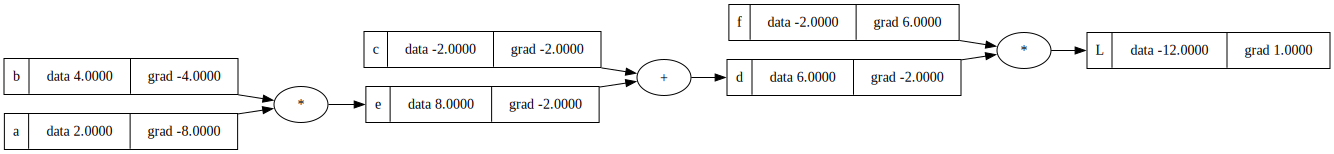

In [50]:
draw_dot(L)

In [49]:
L.backward()

In [ ]:
#here rectangle are the real nodes

In [ ]:
# Moving to the backpropagation part
# Now we will differentiate output node 'L' with respect to each of the other nodes (a,b,e,c,d,f) 
# Consider L as an output of Loss function and other variables as the weight in a neural network

In [109]:
# L = d * f
# dL/dd = ? -> d(d*f)/dd = f (d.grad)
# dL/df = ? -> d(d*f)/df = d (f.grad)
# dL/dc = ? -> using chain rule of differentiation -> (dL/dd) * (dd/dc) = f * (dd/dc) {dL/dd = f} = f * (d(e + c)/dc) = f * ( 0 + 1) = f
# Similarly dL/de = ? -> using chain rule -> dL/de = f
# Similarly dL/da = fb -> -2 * 4 = -8.0
# and dL/db = fa -> -2 * 2 = -4.0
# MANUAL BACKPROPAGATION

In [24]:
# So
f.grad = 6.0 #d
d.grad = -2.0 #f
c.grad = -2.0 #f
e.grad = -2.0 #f
b.grad = -4.0 #fa
a.grad = -8.0 #fb

In [20]:
# Considering L as an output of any Loss function, now we will do single optimization for all the leaf nodes
# Here gradient for each node is giving power/access to influence the output of the whole expression so changing the gradient will change the output 
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a*b
d = e + c
L = d*f

print(L.data)
# After getting output we can run backpropagation again in backward direction to change the gradient on the basis of our output is correct or not

-10.831408


In [21]:
L.grad = 1.0 #manually setting gradient of L with respect to L as 1

In [22]:
def checkingDerivative():
    #Calculating derivative
    
    h = 0.0001
    
    a = Value(2.0, label = 'a')
    b = Value(4.0, label = 'b')
    c = Value(-2, label = 'c')
    e = a*b; e.label = 'e'
    d = e + c; d.label= 'd'
    f = Value(-2.0, label = 'f')
    L = d*f; L.label = 'L'
    L1 = L.data

    a = Value(2.0, label = 'a') # adding 'h' to the a just like (x+h)
    b = Value(4.0, label = 'b')
    c = Value(-2, label = 'c')
    c.data += h
    e = a*b; e.label = 'e'
    d = e + c; d.label= 'd'
    f = Value(-2.0, label = 'f')
    L = d*f; L.label = 'L'
    L2 = L.data

    print((L2-L1)/h)
    
checkingDerivative()

-1.9999999999953388


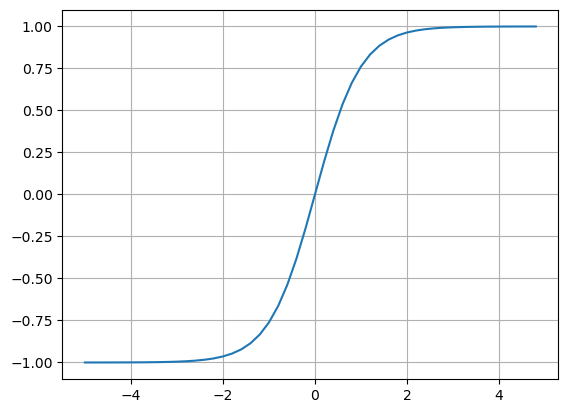

In [106]:
#Backpropagate through neuron 'not nodes'
# tanh function for activation
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid(); plt.show()

In [35]:
# Structure of a single neuron
# inputs x1, x2 
x1 = Value(2.0, label ='x1')
x2 = Value(0.0, label='x2')

# weights of the neuron w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

#bias of the neuron b
b = Value(6.881373587019432, label='b')

#x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2=x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'


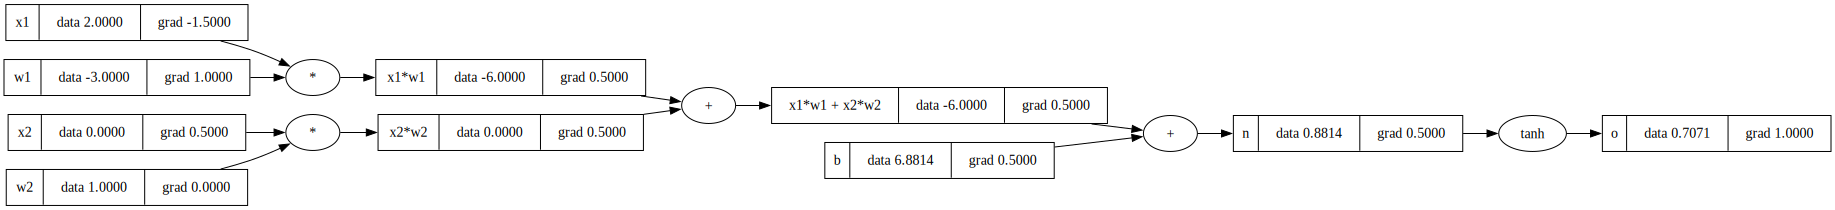

In [40]:
draw_dot(o)

In [137]:
# Manual Backpropagation #2
# Now we will find derivative of output 'o' w.r.t each of inputs, weights and biases
# o -> tanh
# Derivative of tanh(x) w.r.t x is 1 - (tanh(x))**2
# i.e 1 - o**2 (o is tanh(n)))
o.grad = 1.0 # do/do -> 1

In [210]:
# o = tanh(n)
# do/dn = 1 - o**2
1 - (0.7071**2)

0.5000095900000001

In [138]:
n.grad = 0.5

In [143]:
# do/dx1w1x2w2 = (do/dn)*(dn/dx1w1x2w2) -> (d(tanh(n))/dn)*(d(x1w1x2w2 + b)/dx1w1x2w2) -> 1 - tanh(n)**2 -> 1 - o**2
x1w1x2w2.grad = 0.5
#Similarly
b.grad = 0.5

In [140]:
# Similarly
x1w1.grad = 0.5
x2w2.grad = 0.5

In [141]:
# Also for  : do/dx2 -> (do/dx2w2)*(dx2w2/dx2) On Solving -> do/dx2 = w2*x2w2
# Similarly -> do/dw2 -> x2*x2w2

x2.grad = w2.data * x2w2.data
w2.grad = x2.data * x2w2.data

# And
x1.grad = w1.data * x1w1.data
w1.grad = x1.data * x1w1.data

In [266]:
# Automatic backpropagation using '_backward()' function
o.grad = 1.0
o._backward()

In [267]:
n._backward()

In [268]:
b._backward()

In [269]:
x1w1x2w2._backward()

In [270]:
x1w1._backward()
x2w2._backward()

In [271]:
x1._backward()
x2._backward()
w1._backward()
w2._backward()

In [274]:
# Topological order of the graph
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)

build_topo(o)
topo

[Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=0.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=-6.0),
 Value(data=6.881373587019432),
 Value(data=0.8813735870194321),
 Value(data=0.7071067811864921)]

In [33]:
#  Automatic backpropagation technique 
# Creating a topological order and calling backward function with for loop 
#  Making the below code as a function -> backward()

o.grad = 1.0

# Creates topological order for all the nodes in the expression
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)

build_topo(o)

# Running backward function in reverse of the topological order using for loop
for node in reversed(topo):
    node._backward()

In [39]:
# Now calling backward() function for the ouput 
o.backward()

In [41]:
# Bug in backpropagation
a = Value(4.0, label='a')
b = a + a; b.label= 'b'
b.backward()

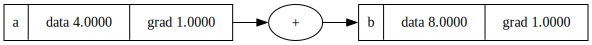

In [42]:
draw_dot(b)

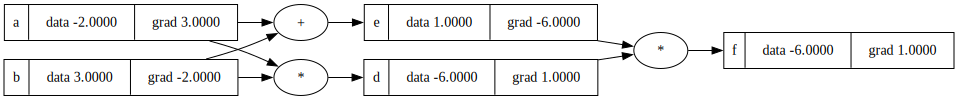

In [43]:
# Here is overlapping of node 'a'
#  More complicated way to see this is : 
# Consider
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b; d.label = 'd'
e = a + b; e.label = 'e'
f = d * e; f.label='f'
f.backward()

draw_dot(f)

In [ ]:
#  The issue lies in using the same variable more than once
# So we have to add the derivative at each point
# self.grad = 1.0 * out.grad -> self.grad += 1.0 * out.grad

In [72]:
# Breaking up tanhx to its more complex form
# To handle the constant within the expression -> a = b + 1; 1 is not a value object so we cannot access .data property
# We have to use if else and wrap the constant within the Value object
# other = other if isinstance(other, Value) else Value(other)
a = Value(3.0, label = 'a')
b = 2 + a; b.label = 'b'
b

Value(data=5.0)

In [86]:
# It is working for a * 2 but will it work for 2 * a ? No, because a * 2 -> a._mul_ 2 so '2' is other object and 
# we checked only for 'other' not for 'self' as in (2 * a) -> 2._mul_ a , '2' is 'self' here
# In python there is _rmul_ for reversing the multiplication and similarly _radd_ for reversing the addition
a = Value(2.0, label='a')
b = Value(3.0, label='b')
# Division a/b -> a * (1/b) -> a * (b**-1)
a/b
# Power -> a^b
a**2
# Negation
-a
# Subtraction
a - b

Value(data=-1.0)

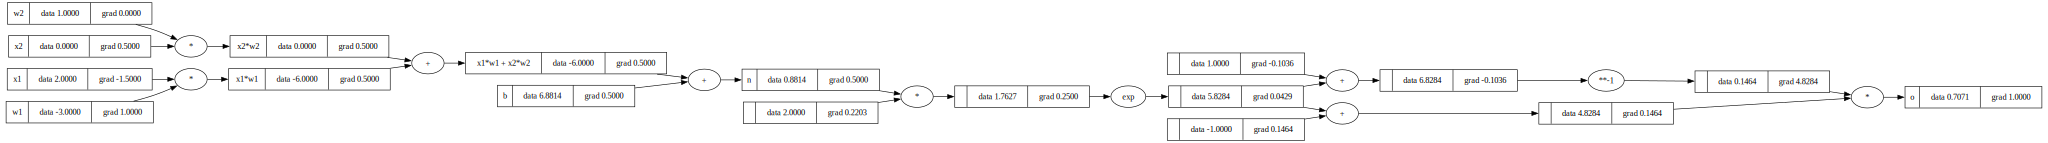

In [89]:
# Breaking up tanh to exponential form
x1 = Value(2.0, label ='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

b = Value(6.881373587019432, label='b')

x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2=x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

# ---------------------------
e = (2*n).exp()
o = (e - 1)/(e + 1)
# ---------------------------

o.label = 'o'
o.backward()
draw_dot(o)